In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df = pd.read_csv('Sleepdata.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
#checking for missing values
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [4]:
#drop column Person ID
df.drop('Person ID', axis=1, inplace=True)

In [5]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [6]:

#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())


Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 3
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


In [7]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [8]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Normal,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [9]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['Normal' 'Sleep Apnea' 'Insomnia']


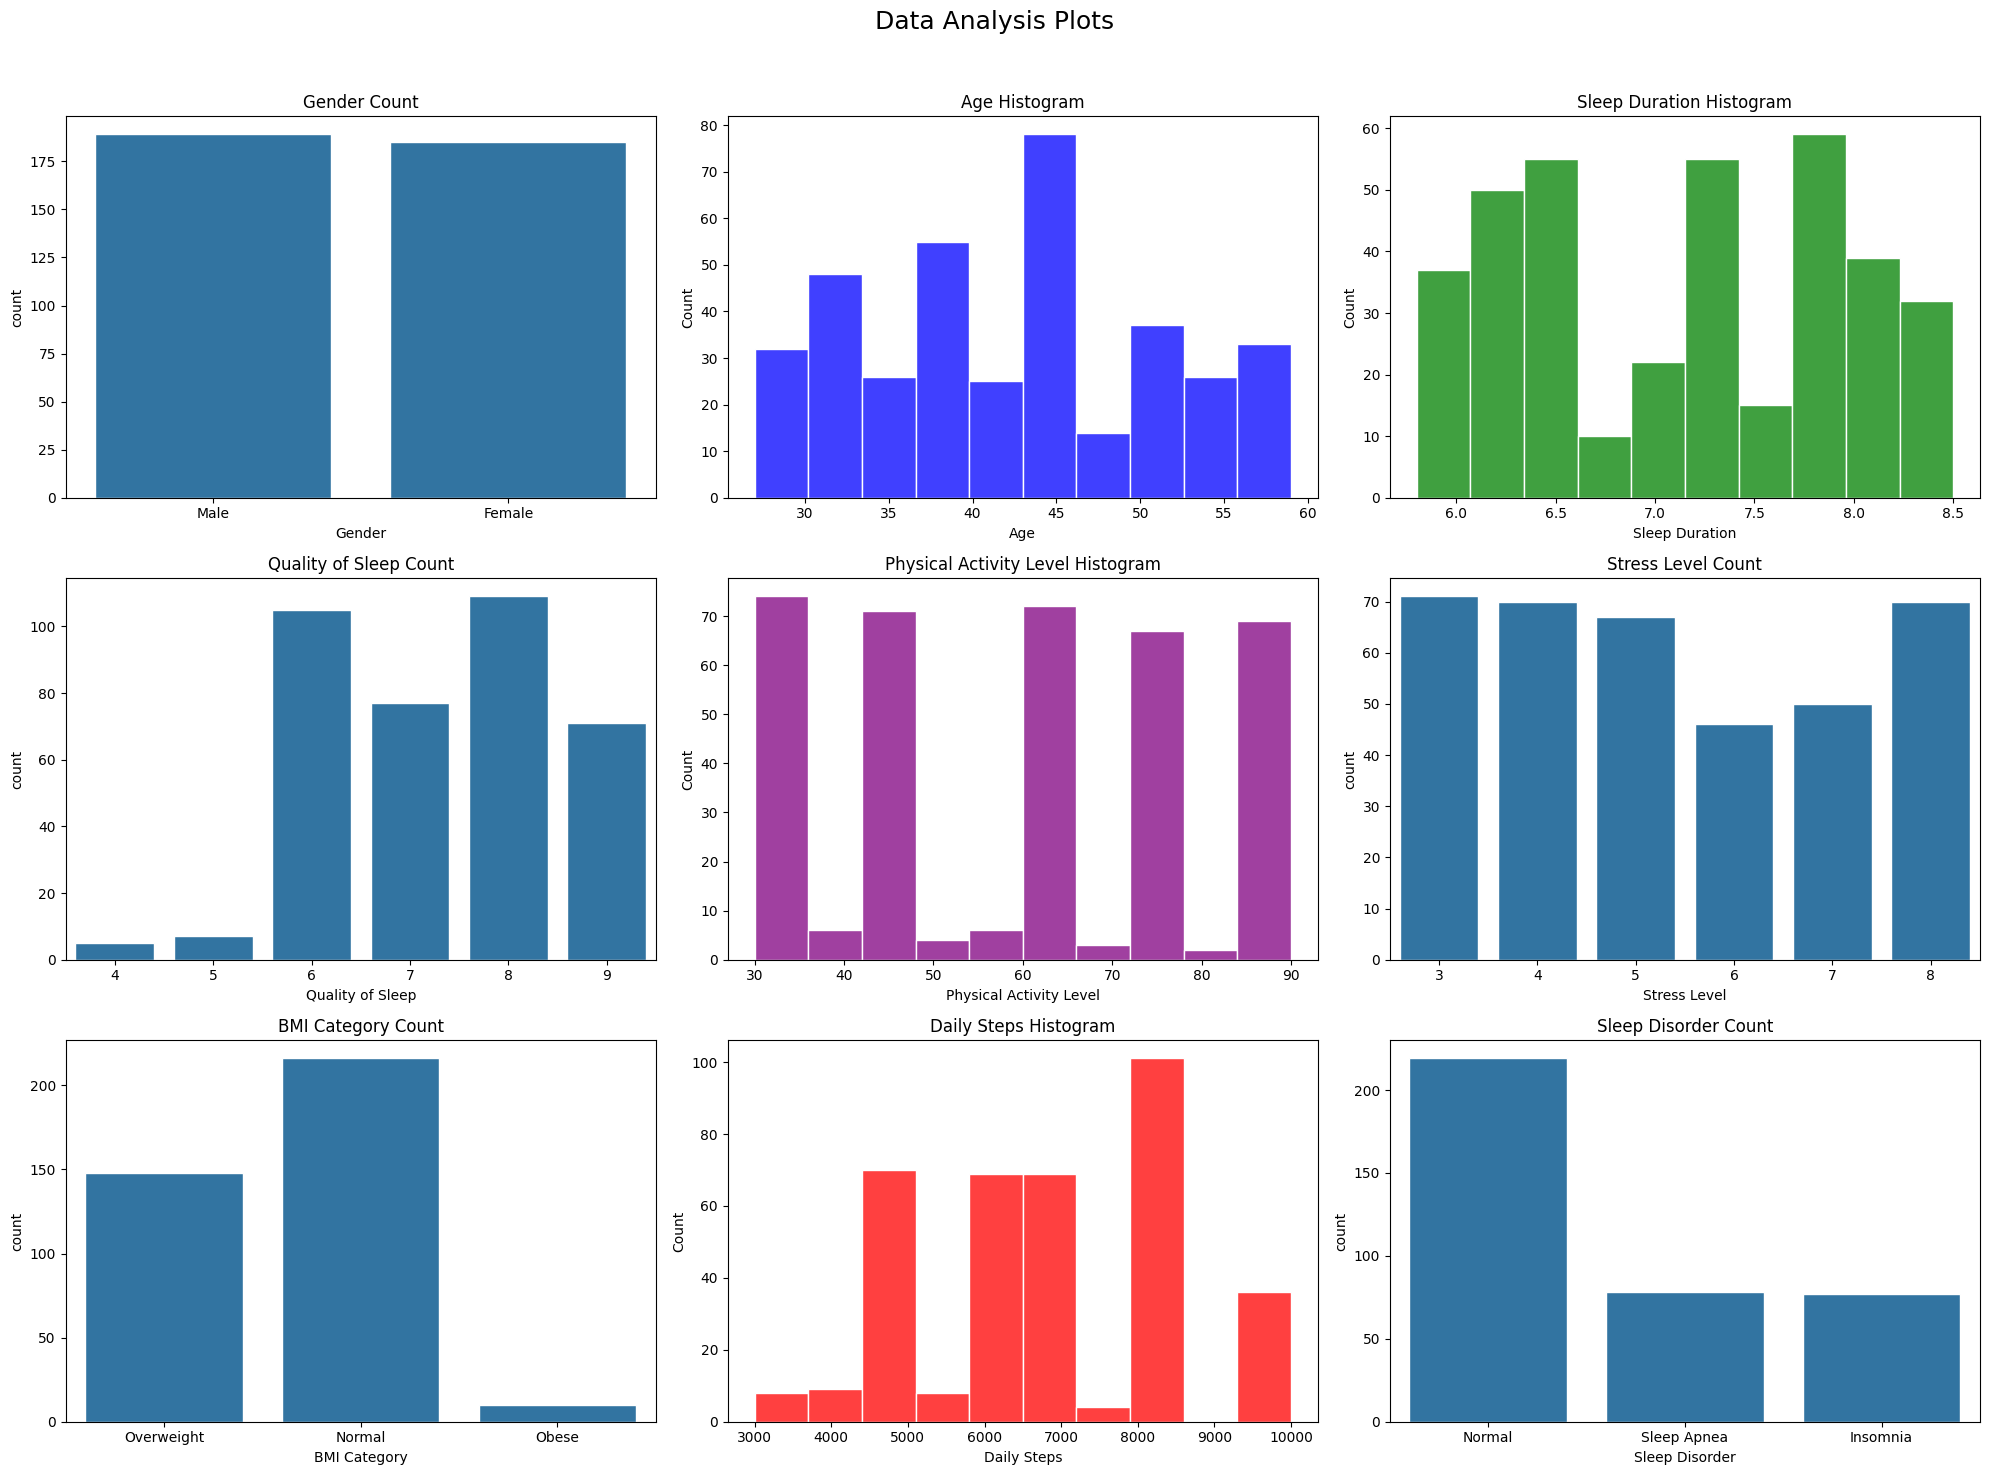

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Data Analysis Plots", fontsize=18)

# Plot each graph
sns.countplot(x='Gender', data=df, ax=axes[0, 0], edgecolor="white")
axes[0, 0].set_title("Gender Count")

sns.histplot(df['Age'], bins=10, kde=False, ax=axes[0, 1], edgecolor="white", color="blue")
axes[0, 1].set_title("Age Histogram")

sns.histplot(df['Sleep Duration'], bins=10, kde=False, ax=axes[0, 2], edgecolor="white", color="green")
axes[0, 2].set_title("Sleep Duration Histogram")

sns.countplot(x='Quality of Sleep', data=df, ax=axes[1, 0], edgecolor="white")
axes[1, 0].set_title("Quality of Sleep Count")

sns.histplot(df['Physical Activity Level'], bins=10, kde=False, ax=axes[1, 1], edgecolor="white", color="purple")
axes[1, 1].set_title("Physical Activity Level Histogram")

sns.countplot(x='Stress Level', data=df, ax=axes[1, 2], edgecolor="white")
axes[1, 2].set_title("Stress Level Count")

sns.countplot(x='BMI Category', data=df, ax=axes[2, 0], edgecolor="white")
axes[2, 0].set_title("BMI Category Count")

sns.histplot(df['Daily Steps'], bins=10, kde=False, ax=axes[2, 1], edgecolor="white", color="red")
axes[2, 1].set_title("Daily Steps Histogram")

sns.countplot(x='Sleep Disorder', data=df, ax=axes[2, 2], edgecolor="white")
axes[2, 2].set_title("Sleep Disorder Count")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [11]:
import plotly.express as px

# Plotly version of Gender count plot with Sleep Disorder as the color
gender_count_plot = px.histogram(
    df,
    x='Gender',
    color='Sleep Disorder',
    barmode='group',  # Bars side by side
    color_discrete_sequence=px.colors.qualitative.Dark24,  # Color scale
    text_auto=True  # Add text labels on top of bars
)

# Update layout for title and axis labels
gender_count_plot.update_layout(
    title="Gender and Sleep Disorder",
    xaxis_title="Gender",
    yaxis_title="Count"
)

# Show the figure
gender_count_plot.show()


In [12]:
import plotly.express as px

# Plotly version of Occupation count plot with Sleep Disorder as the color
occupation_count_plot = px.histogram(
    df,
    x='Occupation',
    color='Sleep Disorder',
    barmode='group',  # Bars side by side
    color_discrete_sequence=px.colors.qualitative.Plotly,  # Default Plotly color sequence
    text_auto=True  # Add text labels on top of bars
)

# Rotate x-axis labels and update layout
occupation_count_plot.update_layout(
    title="Occupation and Sleep Disorder",
    xaxis={'tickangle': 90},  # Rotate x-axis labels 90 degrees
    xaxis_title="Occupation",  # Add x-axis title
    yaxis_title="Count"        # Add y-axis title
)

# Show the plot
occupation_count_plot.show()


In [13]:
bmi_category_plot = px.histogram(
    df,
    x='BMI Category',
    color='Sleep Disorder',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Set1,
    text_auto=True
)

# Fix text orientation
bmi_category_plot.update_traces(textangle=0)  # Keep labels horizontal

# Add titles
bmi_category_plot.update_layout(
    title="BMI Category and Sleep Disorder",
    xaxis_title="BMI Category",
    yaxis_title="Count"
)

# Show the plot
bmi_category_plot.show()


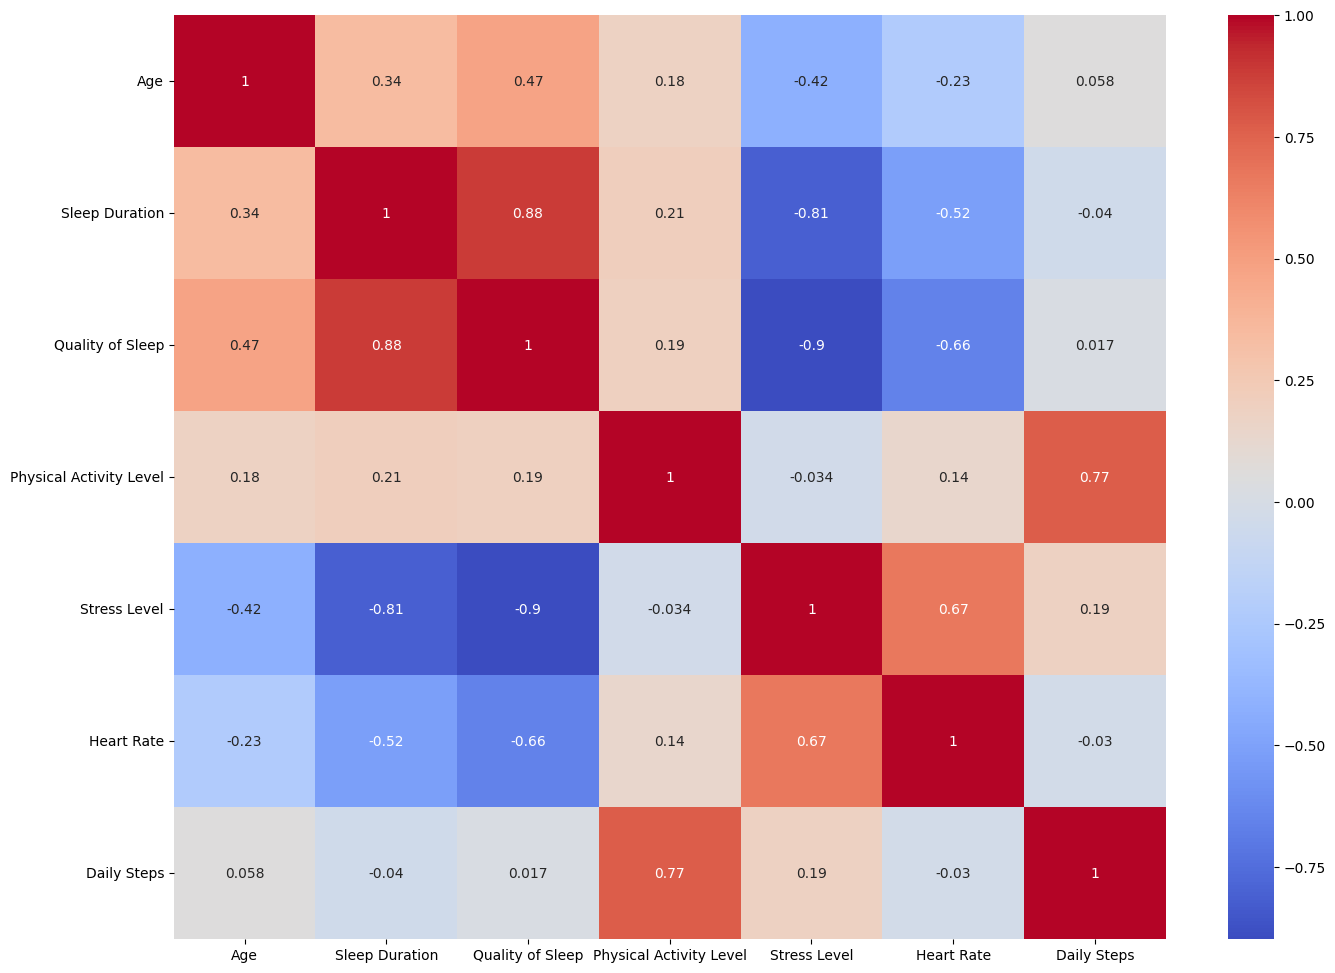

In [14]:
#Correlation Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show() # Add this line to display the plot

Train & Testing

LIGHTGBM


In [27]:
# Import necessary libraries
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [28]:
# Load dataset
df = pd.read_csv("Sleepdata.csv")


In [29]:
# Drop unnecessary columns and preprocess blood pressure
df.drop('Person ID', axis=1, inplace=True)
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0]).astype(int)
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1]).astype(int)
df.drop('Blood Pressure', axis=1, inplace=True)


In [30]:
# Encode categorical columns
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


In [31]:
# Separate features and target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']


In [32]:
# Apply SMOTE with a specific sampling strategy
sampling_strategy = {0: 300, 1: 400, 2: 500}  # Adjust sampling for encoded labels
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [33]:
# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [34]:
# Apply manual scaling to features based on importance
manual_importance = {
    'Sleep Duration': 3,
    'Quality of Sleep': 2.5,
    'BMI Category': 2,
    'Stress Level': 1.5,
    'Age': 1.5,
    'Heart Rate': 1,
    'Physical Activity Level': 0.6,
    'Daily Steps': 0.6,
    'systolic_bp': 1,
    'diastolic_bp': 1,
    'Occupation': 0.3,
    'Gender': 0.3
}

# Scale the features in the training, validation, and test sets
for feature, weight in manual_importance.items():
    X_train[feature] *= weight
    X_valid[feature] *= weight
    X_test[feature] *= weight

# Train LightGBM model
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(encoders['Sleep Disorder'].classes_),
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

# Train the model with early stopping
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='multi_error',
    callbacks=[lgb.early_stopping(stopping_rounds=50)],  # Use early stopping
    categorical_feature='auto'
)

# Calculate predictions on the training data
y_train_pred = lgb_model.predict(X_train)

# Calculate and display training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 864, number of used features: 12
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits wit

Final LightGBM Accuracy on Test Data: 95.00%

Classification Report:

              precision    recall  f1-score   support

    Insomnia       1.00      0.89      0.94        54
      Normal       0.91      0.99      0.95        83
 Sleep Apnea       0.96      0.95      0.96       103

    accuracy                           0.95       240
   macro avg       0.96      0.94      0.95       240
weighted avg       0.95      0.95      0.95       240



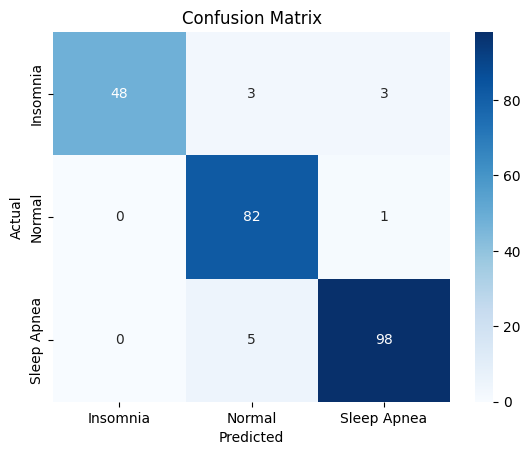

In [35]:
# Predict on test data
y_pred = lgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final LightGBM Accuracy on Test Data: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=encoders['Sleep Disorder'].classes_))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoders['Sleep Disorder'].classes_,
            yticklabels=encoders['Sleep Disorder'].classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


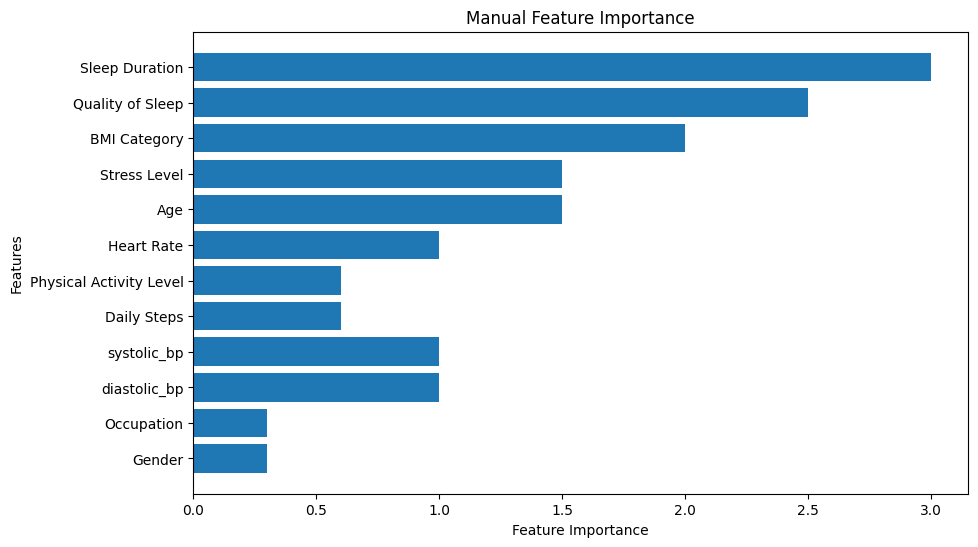

In [36]:

# Plot Manual Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(list(manual_importance.keys()), list(manual_importance.values()))
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Manual Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [37]:
# Save the trained model and encoders
joblib.dump(lgb_model, "best_lightgbm_model.pkl")
joblib.dump(encoders, "label_encoders.pkl")
print("Model and encoders saved.")


Model and encoders saved.


In [38]:
# Prediction function
def predict_sleep_disorder(input_data):
    # Convert input data into a DataFrame
    input_df = pd.DataFrame([input_data])

    # Warning-based override for Insomnia
    if (input_data['Sleep Duration'] < 5.5) and (input_data['Stress Level'] > 7) and (input_data['Quality of Sleep'] < 4):
        print("Warning: Patient shows high risk of Insomnia due to insufficient sleep duration, high stress, and low quality of sleep.")
        return "Insomnia"

    # Encode categorical columns
    for col in categorical_cols[:-1]:  # Exclude target column
        input_df[col] = encoders[col].transform(input_df[col])

    # Predict sleep disorder
    prediction = lgb_model.predict(input_df)
    class_mapping = {i: cls for i, cls in enumerate(encoders['Sleep Disorder'].classes_)}
    return class_mapping[prediction[0]]


In [39]:
# Example input data
input_data = {
    'Sleep Duration': 5.0,  # Example: 5 hours
    'Quality of Sleep': 3,  # Example: 3 out of 9
    'BMI Category': 'Obese',  # Example: 'Normal', 'Overweight', 'Obese'
    'Stress Level': 9,  # Example: 9 out of 10
    'Age': 32,  # Example: 32 years
    'Heart Rate': 84,  # Example: 84 bpm
    'Physical Activity Level': 50,  # Example: 50 out of 100
    'Daily Steps': 6000,  # Example: 6000 steps
    'systolic_bp': 140,  # Example: 140 mmHg
    'diastolic_bp': 80,  # Example: 80 mmHg
    'Gender': 'Male',  # Options: 'Male', 'Female'
    'Occupation': 'Engineer'  # Example: 'Engineer', 'Doctor', etc.
}

# Predict and display the result
result = predict_sleep_disorder(input_data)
print(f"Predicted Sleep Disorder: {result}")


Predicted Sleep Disorder: Insomnia
